In [ ]:
pip install tensorflow

In [43]:
import numpy as np
# from tensorflow.keras import * # Functionally both are the same
# from keras import * # The second option has better documentation pop-up support in VS Code

# from tensorflow.keras import Sequential

import pandas as pd
from keras import Input
from keras import Sequential, layers
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# (2) Basic architecture

In [3]:
# Target y (classification task 0/1, e.g. cat/dog)
y = 1

# Input X = one single observation, 4 features (x1, x2, x3, x4)
# (e.g. eyes color, ears_lenghts, ...)
X = [1., -3.1, -7.2, 2.1]

In [4]:
# Imagine you have a linear regression with some weights
def linreg_1(X):
    return -3 + 2.1*X[0] - 1.2*X[1] + 0.3*X[2] + 1.3*X[3]

out_1 = linreg_1(X)

# And you transform it's output
def activation(x):
    if x > 0:
        return x
    else:
        return 0

out_1 = activation(out_1)
print(out_1)

3.39


In [5]:
# applying another linear regression to the same input X
# followed by the same activation function
def linreg_2(X):
    return -5 - 0.1*X[0] + 1.2*X[1] + 4.9*X[2] - 3.1*X[3]

out_2 = activation(linreg_2(X))
print(out_2)

0


In [6]:
# And a third one
def linreg_3(X):
    return -8 + 0.4*X[0] + 2.6*X[1] +- 2.5*X[2] + 3.8*X[3]

out_3 = activation(linreg_3(X))
print(out_3)

10.32


In [7]:
# What if we use the 3 outputs of this layer as input of another layer, again?
def linreg_next_layer(X):
    return 5.1 + 1.1*X[0] - 4.1*X[1] - 0.7*X[2]

def activation_next_layer(x):
    # sigmoid activation for clasification task!
    return 1. / (1 + np.exp(-x))

def neural_net_predictor(X):
    out_1 = activation(linreg_1(X))
    out_2 = activation(linreg_2(X))
    out_3 = activation(linreg_3(X))

    outs = [out_1, out_2, out_3]

    y_pred = activation_next_layer(linreg_next_layer(outs))

    return y_pred

# Final prediction
y_pred = neural_net_predictor(X)
print(f' Probability of being a dog: {y_pred}')

 Probability of being a dog: 0.832716044461517


# (3) Keras

In [8]:
# 1. Define the architecture f of your model that, given an input X, it outputs y_pred = f_theta_0 (X) (Here, the weights theta_0 are random)
# model = Sequential()
# model.add(...)

# 2. Define the methods to estimate the best theta possible, which means having y_pred close to the real output y
# model.compile(...)

# 3. Fitting on on data: Going from theta_0 => theta based on the data X and y
# model.fit(X, y, ...)

# Then, you can use it
# y_new = model.predict(X_new)

## (3.2) Sequential architecture: model.add(...)

In [10]:
# Each layer has to be added with the model.add(...)

# Basically, it will look like a sequence of layers
model = Sequential()

# First layer: 10 neurons and ReLU as the activation function
model.add(layers.Dense(10, activation='relu'))

# Disclaimer: The standard layers are called Fully Connected (Dense in Keras)
model

<Sequential name=sequential, built=False>

In [11]:
# You can go for two fully connected layers
model = Sequential()
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(20, activation='tanh'))
model

<Sequential name=sequential_1, built=False>

In [14]:
# You can also go for many, many, many more ...
model = Sequential()
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(20, activation='tanh'))
model.add(layers.Dense(10, activation='linear'))
model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.Dense(40, activation='softmax'))
model.add(layers.Dense(10, activation='tanh'))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(9, activation='tanh'))
model.add(layers.Dense(8900, activation='relu'))
model.add(layers.Dense(1000, activation='tanh'))
model

<Sequential name=sequential_4, built=False>

## (3.3) Decision Rules

### Rule 1: Tell the model the shape of your inputs

In [16]:
model = Sequential()

# Imagine each observation has 4 features (x1, x2, x3, x4)
model.add(Input(shape=(4,))) # Shape has to be a tuple

### Rule 2: The last layer is dictated by the task

In [17]:
# Regression tasks require a linear activation function
# size 1 (predict one value):
model.add(layers.Dense(1, activation='linear'))

# or size 13 (y_pred.shape(13,))
model.add(layers.Dense(13, activation='linear'))

In [18]:
# Classification tasks require a sigmoid or softmax activation function
# 2 classes (binary)
model.add(layers.Dense(1, activation='sigmoid'))

# 8 classes (y_pred.shape=(8,))
model.add(layers.Dense(8, activation='softmax'))

In [20]:
# Full Model Recap

# Regression of size 1
model = Sequential()
model.add(Input(shape=(100,)))
model.add(layers.Dense(10, activation='relu'))
#model.add(...)
model.add(layers.Dense(1, activation='linear'))

# Regression of size 13
model = Sequential()
model.add(Input(shape=(100,)))
model.add(layers.Dense(10, activation='relu'))
#model.add(...)
model.add(layers.Dense(13, activation='linear'))

# Classification with 2 classes
model = Sequential()
model.add(Input(shape=(100,)))
model.add(layers.Dense(10, activation='relu'))
#model.add(...)
model.add(layers.Dense(1, activation='sigmoid'))

# Classification with 8 classes
model = Sequential()
model.add(Input(shape=(100,)))
model.add(layers.Dense(10, activation='relu'))
#model.add(...)
model.add(layers.Dense(8, activation='softmax'))

## (3.4) Counting number of parameters with model.summary()

In [27]:
# Small exercice: how many parameters in this simple regression task:
model = Sequential()
model.add(Input(shape=(4,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

(10*4 + 10) + (1*10 + 1)

61

In [22]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Small exercice: how many parameters in this model:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

(784*64 + 64) + (64*64 + 64) + (64*10 + 10)

55050

In [25]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

# (4) Training: loss & optimization procedure

In [ ]:
# model.compile(...)
# model.fit(...)

# 5 Full Example: Face recognition

In [29]:
# Load data
faces = fetch_lfw_people(min_faces_per_person=200, resize=0.25)

# 766 images of 31 * 23 pixel black & white
print(faces.images.shape)

(766, 31, 23)


In [31]:
# 2 different target classes
np.unique(faces.target)

array([0, 1])

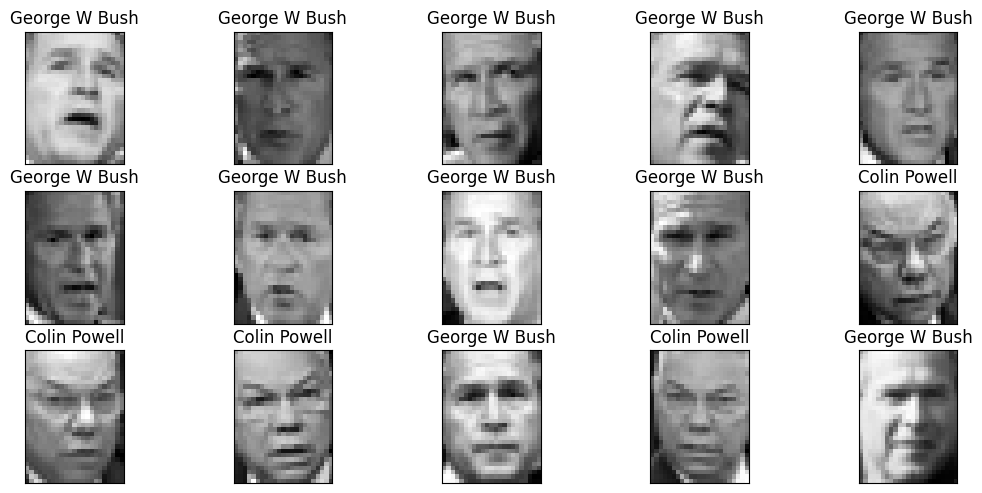

In [34]:
# Let's visualize some faces:
fit = plt.figure(figsize=(13, 10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.title(faces.target_names[faces.target[i]], size=12)
    plt.imshow(faces.images[i], cmap=plt.cm.gray)
    plt.xticks(()); plt.yticks(())

In [35]:
# Minimal preprocessing
# Flatten our 766 images
X = faces.images.reshape(766, 31*23)
X.shape

(766, 713)

In [36]:
y = faces.target
y.shape

(766,)

In [39]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [40]:
# Simple model with 2 hidden layers

# Model definition
model = Sequential()
model.add(Input(shape=(713,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 20)             │        14,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,501 (56.64 KB)

 Trainable params: 14,501 (56.64 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5906 - loss: 0.6187
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9007 - loss: 0.3273
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9460 - loss: 0.1920
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9774 - loss: 0.1186
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9843 - loss: 0.0892
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9878 - loss: 0.0683
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9965 - loss: 0.0447
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0310
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0217 
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0165
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0128
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - l

In [42]:
# Evaluate performance
model.evaluate(scaler.transform(X_test), y_test)
# returns [loss, metrics]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9427 - loss: 0.3160  


[0.3159751892089844, 0.9427083134651184]

In [44]:
# Is it good? What's our baseline?
pd.Series(y).value_counts()

1    530
0    236
Name: count, dtype: int64

In [45]:
# Baseline score
530 / (530+236)

0.6919060052219321

In [46]:
# Predicted probabilities
model.predict(scaler.transform(X_test))[:10]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[9.9988937e-01],
       [5.9255056e-02],
       [9.9984342e-01],
       [1.3169414e-05],
       [1.3571748e-02],
       [9.9975234e-01],
       [3.3598945e-03],
       [9.9968606e-01],
       [4.4454687e-06],
       [9.9997520e-01]], dtype=float32)